### 1. Воздушные перевозки

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).

Данные должны содержать перелеты воздушных судов в 2008 году (вероятно в США)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mps

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('2008.csv')
df[:2]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003,1955,2211,2225,WN,335,...,4,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754,735,1002,1000,WN,3231,...,5,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.keys()

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

**Задание 1:** Рассчитать топ-10 массовых перевозчиков.

In [4]:
print('Топ-10 массовых перевозчиков')
df['Number of Flights'] = 1
a = df[['UniqueCarrier', 'Number of Flights']].groupby(['UniqueCarrier']).sum()
b = a['Number of Flights'].sort_values(0, ascending=False)
c = pd.DataFrame(b)
c.reset_index(inplace=True)
c.index = c.index + 1
c[:10]

Топ-10 массовых перевозчиков


,UniqueCarrier,Number of Flights
1,WN,1201754
2,AA,604885
3,OO,567159
4,MQ,490693
5,US,453589
6,DL,451931
7,UA,449515
8,XE,374510
9,NW,347652
10,CO,298455


**Задание 2:** Построить распределение причин отмены рейсов

In [5]:
a = df[['CancellationCode', 'Number of Flights']].groupby(['CancellationCode']).sum()
b = a['Number of Flights'].sort_values(0, ascending=False)
c = pd.DataFrame(b)
c.reset_index(inplace=True)
c.index = c.index + 1
c

,CancellationCode,Number of Flights
1,B,54904
2,A,54330
3,C,28188
4,D,12


Распределение причин отмены рейсов


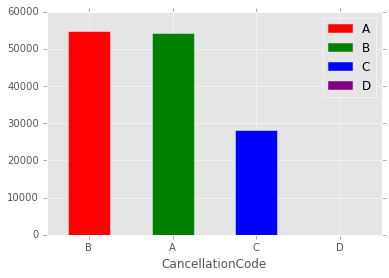

In [6]:
print('Распределение причин отмены рейсов')
c.plot('CancellationCode', 'Number of Flights', kind='bar', color=['red','green','blue','purple'], rot=0)

A = mps.Patch(color='red', label='A')
B = mps.Patch(color='green', label='B')
C = mps.Patch(color='blue', label='C')
D = mps.Patch(color='purple', label='D')
plt.legend(handles=[A, B, C, D], loc=0)
plt.show()

**Задание 3:** Найти самый популярный маршрут, выдать статистику по данному маршруту.

In [7]:
print('Самый популярный маршрут')
a = df[['Origin', 'Dest', 'Number of Flights']]
b = a.groupby(['Origin', 'Dest']).sum()
c = b['Number of Flights'].sort_values(0, ascending=False)
d = pd.DataFrame(c)
d.reset_index(inplace=True)
d[:1]

Самый популярный маршрут


,Origin,Dest,Number of Flights
0,SFO,LAX,13788


In [8]:
print('Статистика по самому популярному маршруту')
e = df['Origin'] ==  d.at[0, 'Origin']
f = df['Dest'] ==  d.at[1, 'Origin']
most_popular = df[e & f]
most_popular.describe()

Статистика по самому популярному маршруту


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Number of Flights
count,13788,13788.000000,13788.000000,13788.000000,13299.000000,13788.000000,13286.000000,13788.000000,13788.000000,13285.000000,...,13286.000000,13299.000000,13788.000000,13788.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,13788
mean,2008,6.337322,15.730418,3.862997,1371.032408,1356.596388,1481.378820,1493.550116,1862.825573,82.417840,...,9.912163,17.273554,0.035466,0.001015,9.689688,0.360280,7.630808,0.026416,42.157225,1
std,0,3.358147,8.791381,1.973866,489.328348,472.940974,502.009856,473.465680,1999.167552,10.184247,...,5.120369,7.126813,0.184960,0.031850,27.959199,8.216006,16.685259,1.009160,46.774688,0
min,2008,1.000000,1.000000,1.000000,3.000000,540.000000,1.000000,5.000000,4.000000,58.000000,...,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
25%,2008,3.000000,8.000000,2.000000,941.000000,945.000000,1054.000000,1110.000000,817.000000,75.000000,...,7.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1
50%,2008,6.000000,16.000000,4.000000,1355.000000,1315.000000,1507.000000,1443.000000,1153.000000,81.000000,...,9.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,28.000000,1
75%,2008,9.000000,23.000000,5.000000,1809.000000,1756.000000,1919.000000,1920.000000,1957.000000,88.000000,...,12.000000,20.000000,0.000000,0.000000,7.000000,0.000000,11.000000,0.000000,64.000000,1
max,2008,12.000000,31.000000,7.000000,2400.000000,2240.000000,2400.000000,2359.000000,7815.000000,196.000000,...,106.000000,84.000000,1.000000,1.000000,339.000000,406.000000,401.000000,54.000000,373.000000,1


**Задание 4:** Найти топ-5 рейсов по каждому из типов delay. Каким перевозчикам они принадлежат?

В силу неоднозначности формулировки задания, моя интерпретация заключается в следующем: я выбрала пять рейсов (по каждому типу, соответственно), задержка (в минутах) которых была максимальной, и вывела данные по каждому из них вместе с перевозчиками, к которым они принадлежали на этот период.

In [9]:
def Top(self):
    a = df[['UniqueCarrier', self]]
    b = a[self].sort_values(0, ascending=False)
    c = pd.DataFrame(b)
    c.reset_index(inplace=True)
    d1 = a[a[self]==int(c[self][0])]
    d2 = a[a[self]==int(c[self][1])]
    d3 = a[a[self]==int(c[self][2])]
    d4 = a[a[self]==int(c[self][3])]
    d5 = a[a[self]==int(c[self][4])]
    alldata = [d1, d2, d3, d4, d5]
    result = pd.concat(alldata)
    result.reset_index(inplace=True)
    result.index = result.index + 1
    print('Топ-5 рейсов по типу ' + self)
    print(result[['UniqueCarrier', self]])

Top('CarrierDelay')

Топ-5 рейсов по типу CarrierDelay
  UniqueCarrier  CarrierDelay
1            NW          2436
2            NW          1951
3            MQ          1707
4            NW          1552
5            NW          1542


In [10]:
Top('WeatherDelay')

Топ-5 рейсов по типу WeatherDelay
  UniqueCarrier  WeatherDelay
1            MQ          1352
2            NW          1297
3            AA          1225
4            AA          1153
5            AA          1148


In [11]:
Top('NASDelay')

Топ-5 рейсов по типу NASDelay
  UniqueCarrier  NASDelay
1            AA      1357
2            AA      1337
3            AA      1289
4            MQ      1207
5            NW      1195


In [12]:
Top('SecurityDelay')

Топ-5 рейсов по типу SecurityDelay
  UniqueCarrier  SecurityDelay
1            EV            392
2            NW            357
3            XE            284
4            XE            280
5            XE            254


In [13]:
Top('LateAircraftDelay')

Топ-5 рейсов по типу LateAircraftDelay
  UniqueCarrier  LateAircraftDelay
1            AA               1316
2            UA               1303
3            UA               1254
4            MQ               1236
5            NW               1184


**Задание 5:** Определить, как распределено количество рейсов от времени дня?

Создадим четыре группы в зависимости от времени отправления:


**0.00 - 6.00** ночное время;
**6.00 - 12.00** утреннее время;
**12.00 - 18.00** дневное время;
**18.00 - 0.00** вечернее время.

(Так как в задании не указано, по какому параметру определять время дня, я выбрала время отправления)

In [14]:
print('Распределение количества рейсов в зависимости от времени дня')
df['TimeOfDay'] = 'morning'
a = df[['DepTime', 'TimeOfDay']]
a.ix[(a.DepTime < 600), ['TimeOfDay']] = 'night'
a.ix[(a.DepTime < 1800) & (a.DepTime > 1200), ['TimeOfDay']] = 'afternoon'
a.ix[(a.DepTime < 2400) & (a.DepTime > 1800), ['TimeOfDay']] = 'evening'
a['Number of flights'] = 1
b = a[['TimeOfDay', 'Number of flights']].groupby(['TimeOfDay']).sum()
c = b['Number of flights'].sort_values(0, ascending=False)
d = pd.DataFrame(c)
d.reset_index(inplace=True)
d.index = d.index + 1
d

Распределение количества рейсов в зависимости от времени дня


,TimeOfDay,Number of flights
1,morning,2799530
2,afternoon,2544966
3,evening,1485283
4,night,179949


Для большей наглядности построим данное распределение: 

Распределение количества рейсов в зависимости от времени дня


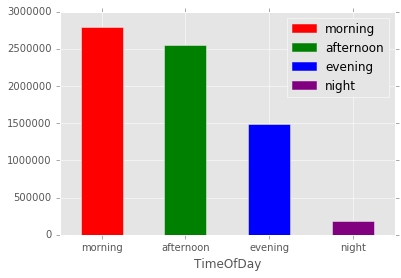

In [15]:
print('Распределение количества рейсов в зависимости от времени дня')
c.plot(kind='bar', color=['red','green','blue','purple'], rot=0)

morning = mps.Patch(color='red', label='morning')
afternoon = mps.Patch(color='green', label='afternoon')
evening = mps.Patch(color='blue', label='evening')
night = mps.Patch(color='purple', label='night')
plt.legend(handles=[morning, afternoon, evening, night], loc=0)
plt.show()

**Задание 6:** Определить "сезонность" во временных рядах по количеству вылетов на каждый день.

Посмотрим пять наиболее "популярных" месяцев для полётов:

In [16]:
a = df[['Month']]
a['NumberOfFlights'] = 1
b = a.groupby(['Month']).sum()
c = b['NumberOfFlights'].sort_values(0, ascending=False)
d = pd.DataFrame(c)
d.reset_index(inplace=True)
d.index = d.index + 1
d[:5]

,Month,NumberOfFlights
1,7,627931
2,3,616090
3,8,612279
4,6,608665
5,5,606293


Построим таблицу, в которой будет следующая группировка: 1. по месяцу, 2. по дню месяца. Главные данные, соответсвенно, - количество вылетов в каждый день.

In [17]:
a = df[['Month', 'DayofMonth']]
a['NumberOfFlights'] = 1
b = a.groupby(['Month', 'DayofMonth']).sum()
с = pd.DataFrame(b)
с[:10]

NumberOfFlights
Month DayofMonth                 
1     1                     19187
      2                     20954
      3                     20937
      4                     20929
      5                     18069
      6                     19897
      7                     20347
      8                     19604
      9                     19820
      10                    20305

Построим график "сезонности" по всем дням 2008 года:

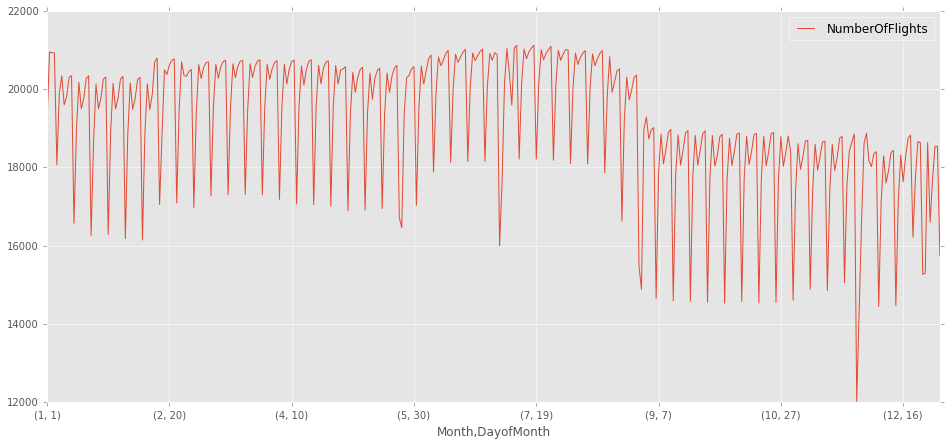

In [18]:
с.plot(figsize=(16,7))

Можем построить подобный график для любого из месяцев, например, для июня:

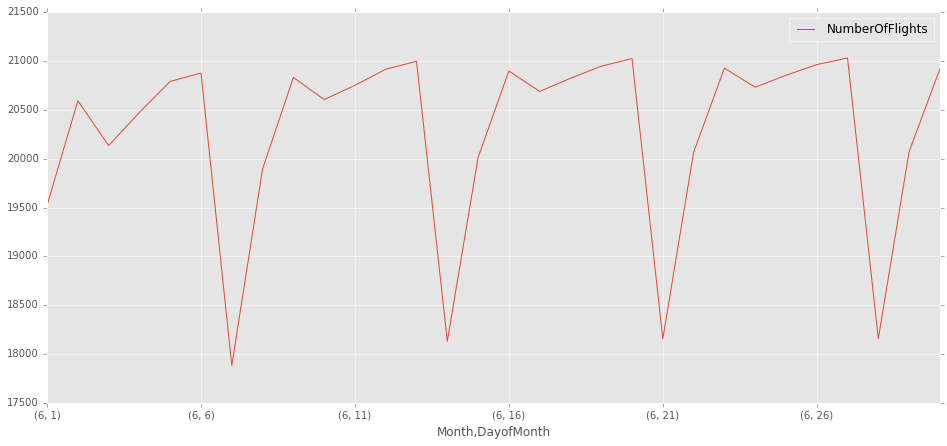

In [19]:
с[(с.index.get_level_values(0))==6].plot(figsize=(16,7))

По графику видим, что количество перелетов резко снижается с регулярностью раз в семь дней. Дополнительно построим таблицу по количеству вылетов в каждый из дней недели:

In [20]:
a = df[['DayOfWeek']]
a['NumberOfFlights'] = 1
b = a.groupby(['DayOfWeek']).sum()
c = b['NumberOfFlights'].sort_values(0, ascending=False)
d = pd.DataFrame(c)
d.reset_index(inplace=True)
d.index = d.index + 1
d

,DayOfWeek,NumberOfFlights
1,3,1039665
2,1,1036201
3,5,1035166
4,4,1032224
5,2,1032049
6,7,976887
7,6,857536


### 2. Продолжаем изучать Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mps

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df2 = pd.read_csv("https://raw.githubusercontent.com/emorisse/FBI-Hate-Crime-Statistics/master/2013/table13.csv")
df2[:2]

,State,Agency type,Agency name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,1st quarter,2nd quarter,3rd quarter,4th quarter,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"


In [3]:
df3 = pd.read_csv("https://raw.githubusercontent.com/emorisse/FBI-Hate-Crime-Statistics/master/2013/table14.csv")
df3[:2]

,State,Agency Type,Agency Name,Q1,Q2,Q3,Q4,Population
0,Alabama,Cities,Ashford,0,0,0,0,"2,177"
1,Alabama,Cities,Ashland,0,0,0,0,"1,926"


Ввиду ограниченности времени, мы не успеваем рассмотреть всё на семинарах. Поэтому часть работы ложится на вас..

Загрузите две csv таблицы [отсюда](https://github.com/emorisse/FBI-Hate-Crime-Statistics) и импортируйте через Pandas. В них содержатся агрегированные данные по различным организациям\городам США, содержащие количество обращений по тем или иным случаям нарушения закона. В одной таблице (table13.csv) перечислены управления, которые сообщали об этих случаях, в другой - которые не сообщали.

**Задание 1:** Изучите документации для методов `unique_values`, `isin`. С помощью этой функции, определите, содержатся ли в двух таблицах одни и те же штаты.

In [4]:
a = df2['State'].unique()
b = df2['State'].unique()
c = []
f = 0
for i in range(50):
    d = df3['State'].isin(a[i:(i+1)])
    e = d.unique()
    if True in e:
        f = f+1
    else:
        c.append(a[i])
print(c)

['DC', 'Nevada']


In [5]:
print('Количество свопадающих штатов равно', + f)
print('Несовпадающие штаты:')
print(c[0], c[1], sep=', ')

Количество свопадающих штатов равно 48
Несовпадающие штаты:
DC, Nevada


**Задание 2:** Изучите документации для методов `append`, `merge` и `concat`. Совместите две таблицы в одну.

In [6]:
df2 = df2.rename(columns={'1st quarter': 'Q1', '2nd quarter': 'Q2', '3rd quarter': 'Q3', '4th quarter': 'Q4',
                          'Agency name': 'Agency Name', 'Agency type': 'Agency Type'})
df2[:2]

,State,Agency Type,Agency Name,Race,Religion,Sexual orientation,Ethnicity,Disability,Gender,Gender Identity,Q1,Q2,Q3,Q4,Population
0,Alabama,Cities,Florence,2,0,0,0,0,0,0,0,1,0,1,"39,481"
1,Alabama,Cities,Hoover,0,0,1,0,0,0,0,0,1,0,0,"84,139"


In [7]:
result = pd.concat([df2, df3], ignore_index=True)
result[:2]

,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation,State
0,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0,Alabama
1,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1,Alabama


In [8]:
cols = result.columns.tolist()
cols = cols[-1:] + cols[:-1]
result = result[cols]
result

,State,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation
0,Alabama,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0
1,Alabama,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1
2,Alabama,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0
3,Alabama,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0
4,Alaska,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0
5,Arizona,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,NaN,1,0,0
6,Arizona,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0
7,Arizona,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0
8,Arizona,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0
9,Arizona,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0


**Задание 3:** Изучите документации для методов `drop_duplicates` и `dropna`. Используйте метод `dropna` для очистки большой таблицы от пропусков. Что произошло? Почему? Исправьте таблицы, чтобы получить корректный ответ.

In [9]:
result.dropna(how='any')
result

,State,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation
0,Alabama,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0
1,Alabama,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1
2,Alabama,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0
3,Alabama,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0
4,Alaska,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0
5,Arizona,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,NaN,1,0,0
6,Arizona,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0
7,Arizona,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0
8,Arizona,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0
9,Arizona,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0


In [10]:
result.drop_duplicates()
result

,State,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation
0,Alabama,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0
1,Alabama,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1
2,Alabama,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0
3,Alabama,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0
4,Alaska,Anchorage,Cities,0,0,0,0,"299,455",2,3,3,0,8,0,0
5,Arizona,Apache Junction,Cities,0,0,0,0,"36,626",1,0,0,NaN,1,0,0
6,Arizona,Avondale,Cities,0,1,0,0,"78,905",1,1,3,0,4,0,0
7,Arizona,Eagar,Cities,0,1,0,0,"5,034",0,1,0,0,0,0,0
8,Arizona,El Mirage,Cities,0,0,0,0,"32,837",0,0,1,0,1,0,0
9,Arizona,Gilbert,Cities,0,0,0,0,"225,232",1,0,0,0,1,0,0


У меня ничего не произошло (таблица не изменилась). **#shithappens**

**Задание 4:** Изучите документации для методов `set_index`, `reset_index` и `pivot_table`. Проиндексируйте общую таблицу по переменным State и Agency Type (одновременно). У вас должен появиться *мультииндекс*.

In [11]:
result.sort_values(['State', 'Agency Type'])
table = result.set_index(['State', 'Agency Type']) 
table

Agency Name  \
State    Agency Type                                                              
Alabama  Cities                                                        Florence   
         Cities                                                          Hoover   
         Cities                                                      Prattville   
         Cities                                                      Tuscaloosa   
Alaska   Cities                                                       Anchorage   
Arizona  Cities                                                 Apache Junction   
         Cities                                                        Avondale   
         Cities                                                           Eagar   
         Cities                                                       El Mirage   
         Cities                                                         Gilbert   
         Cities                                                        Glendale   
         Cities                                                        Goodyear   
         Cities                                                        Maricopa   
         Cities                                                            Mesa   
         Cities                                                         Phoenix   
         Cities                                                        Prescott   
         Cities                                                      Scottsdale   
         Cities                                                           Tempe   
         Cities                                                          Tucson   
         Cities                                                            Yuma   
         Universities and Colleges                  Northern Arizona University   
         Universities and Colleges                        University of Arizona   
         Metropolitan Counties                                          Cochise   
         Metropolitan Counties                                         Maricopa   
         Metropolitan Counties                                             Pima   
         Metropolitan Counties                                             Yuma   
Arkansas Cities                                                     Bentonville   
         Cities                                                      Berryville   
         Cities                                                           Cabot   
         Cities                                                         England   
...                                                                         ...   
Wyoming  Cities                                                        Sundance   
         Cities                                                     Thermopolis   
         Cities                                                      Torrington   
         Cities                                                       Wheatland   
         Cities                                                         Worland   
         Universites and Colleges   Northern Wyoming Community College District   
         Universites and Colleges                         University of Wyoming   
         Metropolitan Counties                                          Laramie   
         Metropolitan Counties                                          Natrona   
         Nonmetropolitan Counties                                        Albany   
         Nonmetropolitan Counties                                      Big Horn   
         Nonmetropolitan Counties                                      Campbell   
         Nonmetropolitan Counties                                        Carbon   
         Nonmetropolitan Counties                                      Converse   
         Nonmetropolitan Counties                                         Crook   
         Nonmetropolitan Counties                                       Fremont   
 

**Задание 5:** В Pandas можно итерировать по DataFrame! Изучите документации для методов `iteritems`, `iterrows`, а так же посмотрите, как можно итерировать по сгруппированным DataFrame'ам. Выделите подтаблицу, состаящую из данных по 3 произвольным штатам и сгруппируйте её по переменным State и Agency Type. С помощью изученных методов (то есть итеративно) выведите суммарную популяцию по каждой паре <Штат>-<Тип>

In [12]:
a = result['State'] == result.at[0, 'State']
b = result['State'] == result.at[7, 'State']
c = result['State'] == result.at[26, 'State']
a2 = result[a]
b2 = result[b]
c2 = result[c]
frames = [a2, b2, c2]
new_table = pd.concat(frames)
new_table

,State,Agency Name,Agency Type,Disability,Ethnicity,Gender,Gender Identity,Population,Q1,Q2,Q3,Q4,Race,Religion,Sexual orientation
0,Alabama,Florence,Cities,0,0,0,0,"39,481",0,1,0,1,2,0,0
1,Alabama,Hoover,Cities,0,0,0,0,"84,139",0,1,0,0,0,0,1
2,Alabama,Prattville,Cities,0,0,0,0,"35,154",1,0,1,0,2,0,0
3,Alabama,Tuscaloosa,Cities,0,0,0,0,"94,126",0,0,1,0,1,0,0
1826,Alabama,Ashford,Cities,NaN,NaN,NaN,NaN,"2,177",0,0,0,0,NaN,NaN,NaN
1827,Alabama,Ashland,Cities,NaN,NaN,NaN,NaN,"1,926",0,0,0,0,NaN,NaN,NaN
1828,Alabama,Auburn,Cities,NaN,NaN,NaN,NaN,"57,970",0,0,0,0,NaN,NaN,NaN
1829,Alabama,Berry,Cities,NaN,NaN,NaN,NaN,"1,124",NaN,0,NaN,NaN,NaN,NaN,NaN
1830,Alabama,Childersburg,Cities,NaN,NaN,NaN,NaN,"5,111",0,0,0,0,NaN,NaN,NaN
1831,Alabama,Courtland,Cities,NaN,NaN,NaN,NaN,607,0,0,0,0,NaN,NaN,NaN


Заметим, что в значении Population тысячи и сотни разделяет запятая. Чтобы просуммировать по данному параметру, воспользуемся методом replace и "избавимся" от запятых, а также to_numeric, чтобы значения были численными.

In [13]:
new_table['Population'] = pd.to_numeric(new_table['Population'].str.replace(',', ''))
d = new_table[['State', 'Agency Type', 'Population']]
f = d.groupby(['State', 'Agency Type']).sum()
g = pd.DataFrame(f)
g.dropna()

Population
State    Agency Type                          
Alabama  Cities                        1029459
         Universities and Colleges       19854
Arizona  Cities                        4926154
         Universities and Colleges      187881
Arkansas Cities                        1739230
         Universities and Colleges       91341

## 3. Метод градиентного спуска

Напомним суть метода градиентого спуска в контексте задачи линейной регрессии.

Дано описание $n$ объектов по $m$ признакам. Обычно оно выражается в виде матрицы размера $n \times m$: $X = [x^{(i)}_j]^{i=1\dots n}_{j=1\dots m} $.<br\> ($x^{(i)}_j$ означает $j$-ый признак $i$-го объекта) <br\>
Дана зависимая переменная, которая тоже имеет отношение к этим объекам: $y$ - вектор длины $n$.

Наша задача, выявить **линейную** зависимость между признаками в $X$ и значениями в $y$:
$$\hat{y} = X\beta \quad \Leftrightarrow \quad \hat{y}^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + \dots$$

И сделать это так, чтобы квадрат суммы ошибок наших оценок был минимален:
$$ L(\beta) = \frac{1}{2n}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2n}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min$$ $$ \Updownarrow $$  $$ L(\beta_0,\beta_1,\dots) = \frac{1}{2n}\sum^{n}_{i=1}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 + \dots - y^{(i)})^2  \rightarrow \min $$

Значение в $X$ и $y$ нам даны. Нам неизвестны только значения коэффициентов $\beta$.<br\> Соответственно, нужно найти такие значения $\beta$, что функция $L(\beta) \rightarrow \min.$

На семинаре мы выяснили, чему равен градиент функции потерь $L(\beta_0, \beta_1):$
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{n}\sum^{n}_{i=1}(\beta_0 + \beta_1x^{(i)}_1 - y^{(i)})x_1^{(i)}$$

Иногда проще это записать в виде матриц:
$$ \frac{\partial L}{\partial \beta} = X^\top(X\beta - y)$$


Метод градиентного спуска заключается в итеративном и **одновременном(!!!)** обновлении значений $\beta$ в направлении, противоположному градиенту:
$$ \beta := \beta - \alpha\frac{\partial L}{\partial \beta}$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mps

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df4 = pd.read_csv('accord_sedan_training.csv')
df4[:2]

,price,mileage,year,trim,engine,transmission
0,14995,67697,2006,ex,4 Cyl,Manual
1,11988,73738,2006,ex,4 Cyl,Manual


**Задача 1:** Загрузите [данные](http://bit.ly/1gIQs6C) по характеристикам автомобилей Honda Accord. Названия столбцов говорят сами за себя.

Составьте матрицу $X$, состоящую из единичного столбца и признака "пробег". <br\>
Составьте вектор $y$ состоящий из стоимости автомобиля.

Если для импорта вы используете `pandas`, то через .values из DataFrame можно получить numpy array.

In [3]:
print('Матрица X, состоящая из единичного столбца и признака "пробег"')
x = df4['mileage'].values
X = np.ones(shape=(x.size, 2), dtype=np.int)
X[:, 1] = x
X

Матрица X, состоящая из единичного столбца и признака "пробег"


array([[     1,  67697],
       [     1,  73738],
       [     1,  80313],
       [     1,  86096],
       [     1,  79607],
       [     1,  96966],
       [     1, 126150],
       [     1, 119255],
       [     1,  73513],
       [     1,  50649],
       [     1,  90000],
       [     1, 114340],
       [     1,  75270],
       [     1,  54685],
       [     1,  68480],
       [     1, 107290],
       [     1,  39144],
       [     1,  42893],
       [     1, 103650],
       [     1,  59100],
       [     1,  96404],
       [     1,  59466],
       [     1,  89692],
       [     1,  91486],
       [     1,  90256],
       [     1,  85976],
       [     1, 103833],
       [     1,  37378],
       [     1,  45414],
       [     1, 108590],
       [     1, 121435],
       [     1,  99904],
       [     1, 121896],
       [     1,  70193],
       [     1, 103927],
       [     1,  34216],
       [     1, 135766],
       [     1,  89350],
       [     1, 133721],
       [     1, 109034],


In [4]:
print('Вектор y, состоящий из стоимости автомобиля')
y = df4['price'].values
y

Вектор y, состоящий из стоимости автомобиля


array([14995, 11988, 11999, 12995, 11333, 10067,  8999, 10595, 13988,
       13990, 12998, 10975, 12989, 14590, 16120,  9880, 12991, 13495,
       11495, 12000, 12000, 14900, 10499, 11680, 12950, 13681, 10694,
       15991, 13995, 11999,  9995, 11995,  9968, 13475, 13900, 13995,
       10888, 12995,  8999, 10692,  7995,  9998, 12999, 12791, 13420,
        9488, 13250, 10642, 13999, 12599, 11995, 12595,  8495, 12950,
        9994,  8991, 12736, 15995, 15991,  9692,  9488, 12495, 12482,
       11900, 11757,  9878, 11988, 11995, 10988, 13637, 14888, 11995,
        7900, 11037, 12413, 15995, 14999,  9495, 16990, 13995, 12810,
        8500, 11949, 10288, 16595, 14995, 10490,  8980, 10995, 11991,
       12589,  9000,  9995, 11995, 12895, 14971, 12998, 12441, 13995,
       15995, 13000, 10988, 13219, 11988, 11995, 11274, 12995, 12988,
       13500, 13850,  7695,  7991,  8998, 13980, 12988, 12995, 12800,
       11990, 12998,  8995, 12977, 11991, 10995, 13995,  9686,  8988,
        8880, 11394,

**Задача 2:** Изобразите функционал квадратичной ошибки $L(\beta_0, \beta_1)$ в 3D и его линии уровня

In [18]:
# Здесь нет моего кода

**Задача 3:** Напишите код, реализующий метод градиентного спуска. На вход метод должен принимать исходные данные, максимальное кол-во итераций и коэффициент скорости спуска.

In [19]:
# Здесь нет моего кода

**Задача 4:** Выведите полученные значения коэфициентов $\beta$. <br\>Как они интерпретируются?  <br\>Изобразите на одном графике $[y - \text{"пробег"}]$ точки и полученную прямую.

In [20]:
# Здесь нет моего кода